In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sample=cv2.imread("./imgs/patch1.png", cv2.IMREAD_GRAYSCALE)

Below is the main psudo code, lets implement it.
```
function GrowImage(SampleImage,Image,WindowSize)
  while Image not filled do
    progress = 0
    PixelList = GetUnfilledNeighbors(Image)
    foreach Pixel in PixelList do
      Template = GetNeighborhoodWindow(Pixel)
      BestMatches = FindMatches(Template, SampleImage)
      BestMatch = RandomPick(BestMatches)
      if (BestMatch.error < MaxErrThreshold) then
        Pixel.value = BestMatch.value
        progress = 1
      end
    end
    if progress == 0 
      then MaxErrThreshold = MaxErrThreshold * 1.1
  end
  return Image
end
```

In [4]:
def growImg(imgSample, imgDst, imgMask, winSize):
    while imgMask.size!=imgMask.sum():
        progress = 0
        pixelList = getUnfilledNeighbors(imgMask)
        for pixel in pixelList:
            imgTemplate = getNeighborhoodWindow(pixel, imgDst, winSize)
            bestMatches = findMatches(imgTemplate, imgSample)
            bestMatch   = randomPick(bestMatches)
            if bestMatch[2] < maxErrThreshold:
                imgDst[pixel[0], pixel[1]] = imgSample[bestMatch[0], bestMatch[1]]
                imgMask[pixel[0], pixel[1]] = 1
                progress = 1
        if progress == 0:
            maxErrThreshold = maxErrThreshold * 1.1
    return imgDst

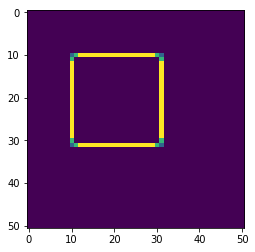

True

In [31]:
def getUnfilledNeighbors(imgMask):
    kernel = np.ones((3,3), np.uint8)
    kernel[1,1]=0
    imgNeighbourCount=cv2.filter2D(mask, -1, kernel)

    newmask = mask.copy()
    newmask=cv2.dilate(newmask, kernel=())
    roi = newmask - mask
    result = imgNeighbourCount*roi
    pixelList=[]
    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            if result[i,j]!=0:
                pixelList.append([i,j])
    
    return result, pixelList

def testGetUnfilledNeighbors():
    mask = np.zeros((51,51), np.uint8)
    mask[11:31, 11:31]=1
    result,pixelList = getUnfilledNeighbors(mask)
    plt.imshow(result)
    plt.show()
    if result[10,10]!=1 or result[31,31]!=1 or result[31,10]!=1 or result[10, 31]!=1:
        print("Test Failed For Corners")
        return False
    elif result[20,20]!=0:
        print("Test Faield For Center")
        return False
    elif result[10, 20]!=3:
        print("Test Failed For Top")
        return False
    else:
        return True
    
testGetUnfilledNeighbors()


In [32]:
def getNeighborhoodWindow(pixel, imgDst, winSize):
    i=pixel[0]
    j=pixel[1]
    left=np.max(j - winSize,0)
    right=np.min(imgDst.shape[1], j+winSize+1)
    top=np.max(i - winSize, 0)
    bottom = np.min(imgDst.shape[0], i + winSize+1)
    
    return imgDst[top:bottom, left:right]

In [34]:
def testGetNeighborhoodWindow():
    mask = np.zeros((51,51), np.uint8)
    mask[11:31, 11:31]=1
    
    roi = getNeighborhoodWindow([0,0], imgDst, 3)
    if roi.shape != (3, 3):
        print("Error: testGetNeighborhoodWindow")
        return False
    else:
        return True
    
testGetNeighborhoodWindow()

NameError: name 'imgDst' is not defined